# Universe method

by Reece Colclough and Oleg Glotov

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [8]:
def check_stationarity(series, alpha, diff):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely has a trend")

    return result_adf[1]

    # print("----------------------------------------------------------------")

    # result_kpss = kpss(diff)
    # p_val = result_kpss[1]
    # if p_val > alpha:
    #     # reject, likely stationary
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely stationary")
    # else:
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely has a trend")


In [9]:
def methodology(stk1, stk2):
    diff = abs(stk1["Adj Close"] - stk2["Adj Close"])

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    line = reg.intercept + reg.slope*time
    new_series = diff - line

    return check_stationarity(new_series, 0.05, diff)

In [10]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2019-01-01"
    end_date = "2023-01-01"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [11]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [12]:
# Obtain Data
universe = ["AAPL","AAL","AMD","AMGN","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM","SCHW","RIOT",]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

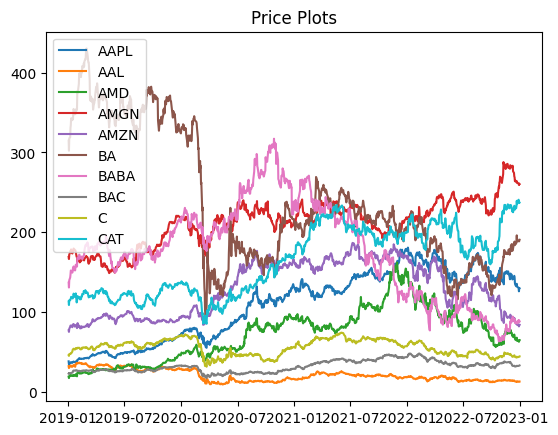

In [13]:
plt.figure()
i = 0
for x in stk_data[:10]:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Price Plots")
plt.savefig('Stock Prices.png', dpi = 1500)
plt.show()

In [14]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAAL
ADF test: p-val= 0.6708069127554627 -> Conclusion: likely has a trend
AAPLAMD
ADF test: p-val= 0.005229773593086487 -> Conclusion: likely stationary
AAPLAMGN
ADF test: p-val= 0.4576144745183344 -> Conclusion: likely has a trend
AAPLAMZN
ADF test: p-val= 0.050650594801830824 -> Conclusion: likely has a trend
AAPLBA
ADF test: p-val= 0.4447802176552233 -> Conclusion: likely has a trend
AAPLBABA
ADF test: p-val= 0.08005428787124608 -> Conclusion: likely has a trend
AAPLBAC
ADF test: p-val= 0.4415487494814516 -> Conclusion: likely has a trend
AAPLC
ADF test: p-val= 0.2985930286857825 -> Conclusion: likely has a trend
AAPLCAT
ADF test: p-val= 0.29883475239495016 -> Conclusion: likely has a trend
AAPLCOST
ADF test: p-val= 0.02822072508727386 -> Conclusion: likely stationary
AAPLCSCO
ADF test: p-val= 0.654777698071721 -> Conclusion: likely has a trend
AAPLCVX
ADF test: p-val= 0.1689573747325987 -> Conclusion: likely has a trend
AAPLDIS
ADF test: p-val= 0.27883284574535394 -> Conclusion

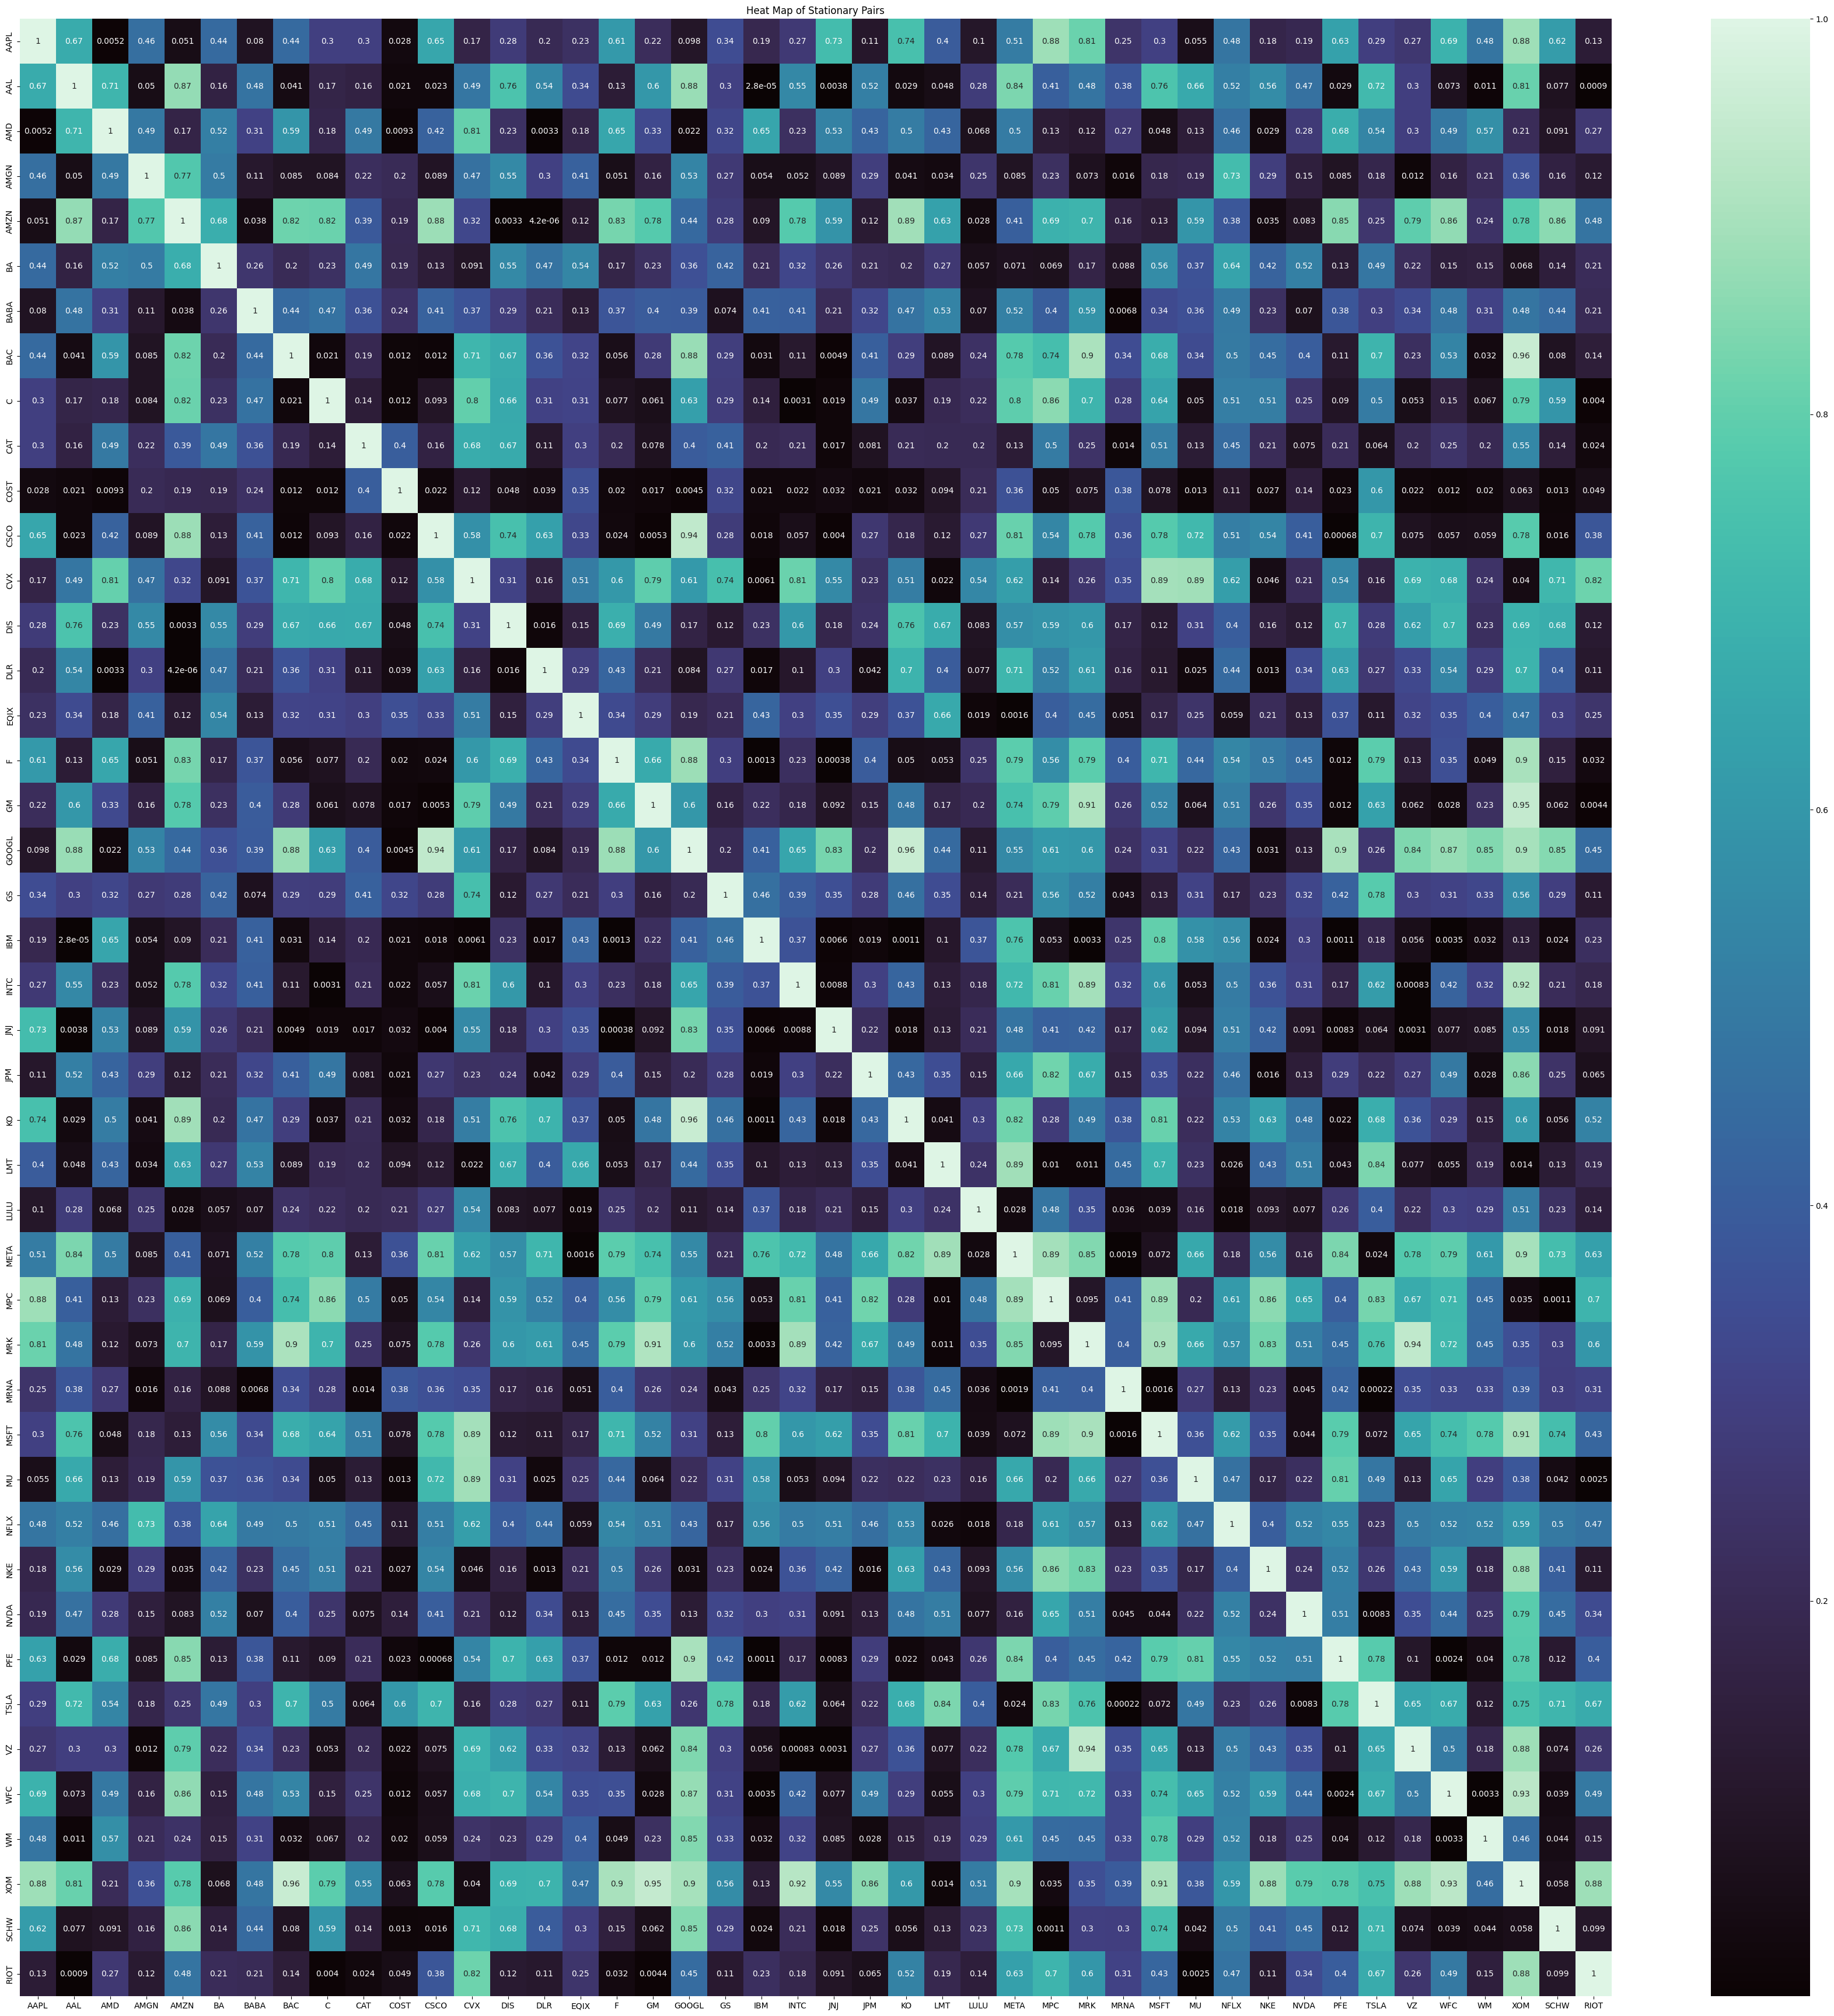

<Figure size 7680x5760 with 0 Axes>

In [15]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum))
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stationary Pairs")
plt.figure(dpi=1200)
plt.savefig('HeatMap.png', dpi = 1200)
plt.show()

In [16]:
data

array([[1.00000000e+00, 6.70806913e-01, 5.22977359e-03, ...,
        8.84706900e-01, 6.18415020e-01, 1.32756773e-01],
       [6.70806913e-01, 1.00000000e+00, 7.06105035e-01, ...,
        8.08644551e-01, 7.73229756e-02, 8.98438392e-04],
       [5.22977359e-03, 7.06105035e-01, 1.00000000e+00, ...,
        2.10424481e-01, 9.11608724e-02, 2.69180560e-01],
       ...,
       [8.84706900e-01, 8.08644551e-01, 2.10424481e-01, ...,
        1.00000000e+00, 5.83000858e-02, 8.83686650e-01],
       [6.18415020e-01, 7.73229756e-02, 9.11608724e-02, ...,
        5.83000858e-02, 1.00000000e+00, 9.90430133e-02],
       [1.32756773e-01, 8.98438392e-04, 2.69180560e-01, ...,
        8.83686650e-01, 9.90430133e-02, 1.00000000e+00]])

In [17]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AAL       AMD      AMGN      AMZN        BA      BABA   
0   1.000000  0.670807  0.005230  0.457614  0.050651  0.444780  0.080054  \
1   0.670807  1.000000  0.706105  0.049524  0.869426  0.161283  0.475252   
2   0.005230  0.706105  1.000000  0.489934  0.170024  0.518994  0.305389   
3   0.457614  0.049524  0.489934  1.000000  0.773044  0.501398  0.108617   
4   0.050651  0.869426  0.170024  0.773044  1.000000  0.682023  0.038208   
5   0.444780  0.161283  0.518994  0.501398  0.682023  1.000000  0.256826   
6   0.080054  0.475252  0.305389  0.108617  0.038208  0.256826  1.000000   
7   0.441549  0.041484  0.590857  0.085310  0.820065  0.203561  0.444913   
8   0.298593  0.172045  0.183282  0.083937  0.815991  0.233284  0.471313   
9   0.298835  0.161921  0.493125  0.222523  0.388636  0.485609  0.361452   
10  0.028221  0.021181  0.009280  0.204302  0.194266  0.189567  0.235347   
11  0.654778  0.022629  0.415907  0.089278  0.881295  0.132947  0.414938   
1

In [18]:
print(sol)
print()
n = 30
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0     GOOGL      KO  0.956034
1       BAC     XOM  0.955080
2        GM     XOM  0.946268
3      CSCO   GOOGL  0.939276
4       MRK      VZ  0.938539
..      ...     ...       ...
941    CSCO     PFE  0.000677
942       F     JNJ  0.000379
943    MRNA    TSLA  0.000221
944     AAL     IBM  0.000028
945    AMZN     DLR  0.000004

[946 rows x 3 columns]

last 30 rows

    level_0 level_1         0
916    AAPL     AMD  0.005230
917     BAC     JNJ  0.004863
918    COST   GOOGL  0.004469
919      GM    RIOT  0.004417
920       C    RIOT  0.004044
921    CSCO     JNJ  0.004036
922     AAL     JNJ  0.003754
923     IBM     WFC  0.003489
924     WFC      WM  0.003327
925    AMZN     DIS  0.003306
926     AMD     DLR  0.003267
927     IBM     MRK  0.003259
928       C    INTC  0.003102
929     JNJ      VZ  0.003063
930      MU    RIOT  0.002508
931     PFE     WFC  0.002405
932    META    MRNA  0.001912
933    MRNA    MSFT  0.001592
934    EQIX    META  0.001554
9